In [48]:
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
df = pd.read_csv('mission_launches.csv')


Drop extra column

In [50]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.duplicated().any()

False

Knowing that some launches do not have any cost information will be important down the road.

In [ ]:
df.isna().any()

Unnamed: 0.1      False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Organisation    4324 non-null   object
 2   Location        4324 non-null   object
 3   Date            4324 non-null   object
 4   Detail          4324 non-null   object
 5   Rocket_Status   4324 non-null   object
 6   Price           964 non-null    object
 7   Mission_Status  4324 non-null   object
dtypes: int64(1), object(7)
memory usage: 270.4+ KB


Update "Date" column to only have the date, and no time information. This took more trial and error than it should have.

In [51]:
df['Date'] = df['Date'].str.extract(r'(\w+ \w+ \d+, \d+)')
df['Date'] = pd.to_datetime(df['Date'])

Add a month column to simplify the graph making down the road

In [41]:
df['Month'] = df['Date'].dt.month
launches_per_month = df['Month'].value_counts().sort_index()

Make a bar graph showing how many launches occur per month. Which shows that December is slightly more popular than the other months to launch rockets into space

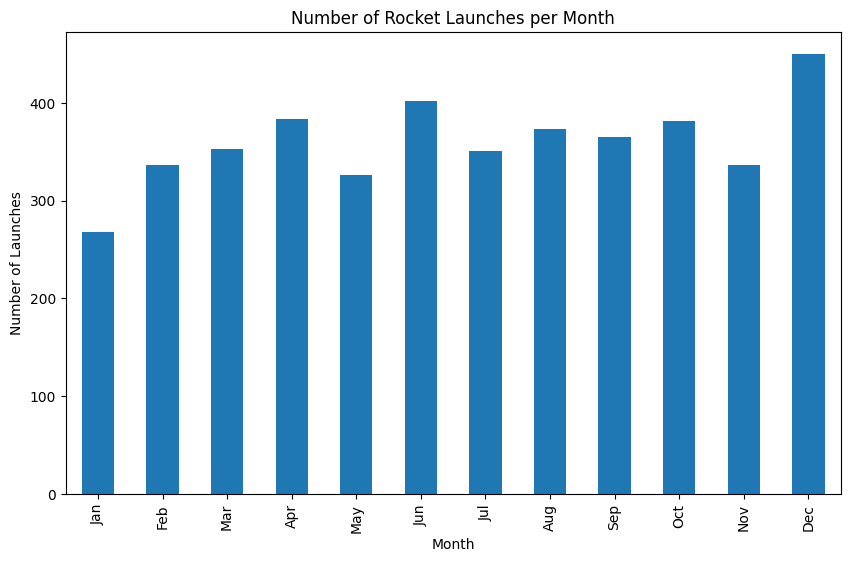

In [17]:

plt.figure(figsize=(10, 6))
launches_per_month.plot(kind='bar')
plt.title('Number of Rocket Launches per Month')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Update the df to add a year column, and then find who which orgainization launched the most rockets each year

In [18]:
df['Year'] = df['Date'].dt.year

launch_counts = df.groupby(['Year', 'Organisation']).size().reset_index(name='Count')

max_launches_per_year = launch_counts.loc[launch_counts.groupby('Year')['Count'].idxmax()]

Build a bar graph to show which organization sent the most rockets into space. and then add the name of the orgainization

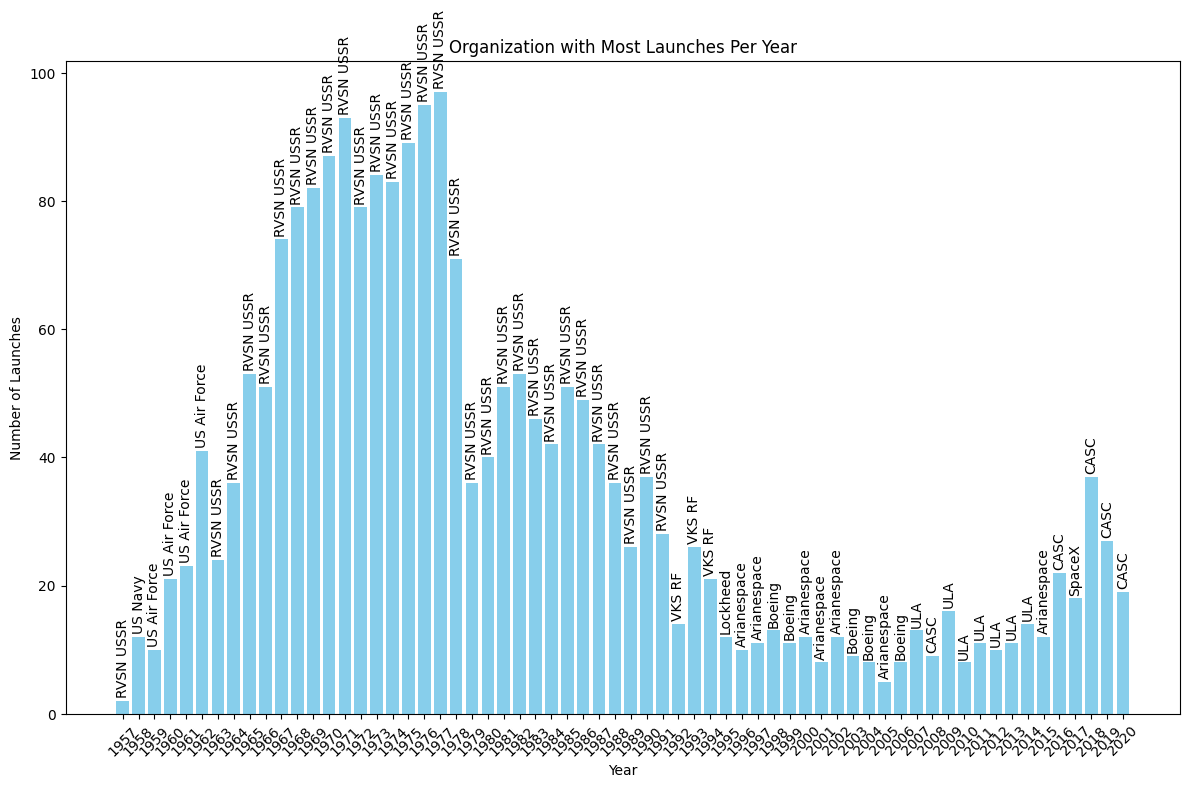

In [19]:
plt.figure(figsize=(12, 8))
bars = plt.bar(max_launches_per_year['Year'].astype(str), max_launches_per_year['Count'], color='skyblue')

for bar, org in zip(bars, max_launches_per_year['Organisation']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, org, ha='center', va='bottom', rotation=90, fontsize=10)

plt.title("Organization with Most Launches Per Year")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Number of Launches")
plt.tight_layout()
plt.show()

how many active rockets exist, and how many have been retired

In [ ]:
df['Rocket_Status'].value_counts()

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

Show how many missions succeeded and failed

In [9]:
df["Mission_Status"].value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

Not all of the launches have recorded costs. so we need to clean up the df to only have the entries with prices

In [52]:
df_clean = df.dropna(subset=['Price']).copy()
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')
df_clean = df_clean.dropna(subset=['Price'])

Derriving a year column from the date column to more easily find the mean price

In [53]:
df_clean['Year'] = df_clean['Date'].dt.year

Building new df for only the cost per year

In [55]:
average_cost_per_year = df_clean.groupby('Year')['Price'].mean().reset_index()

Actually plot the data on a bar graph

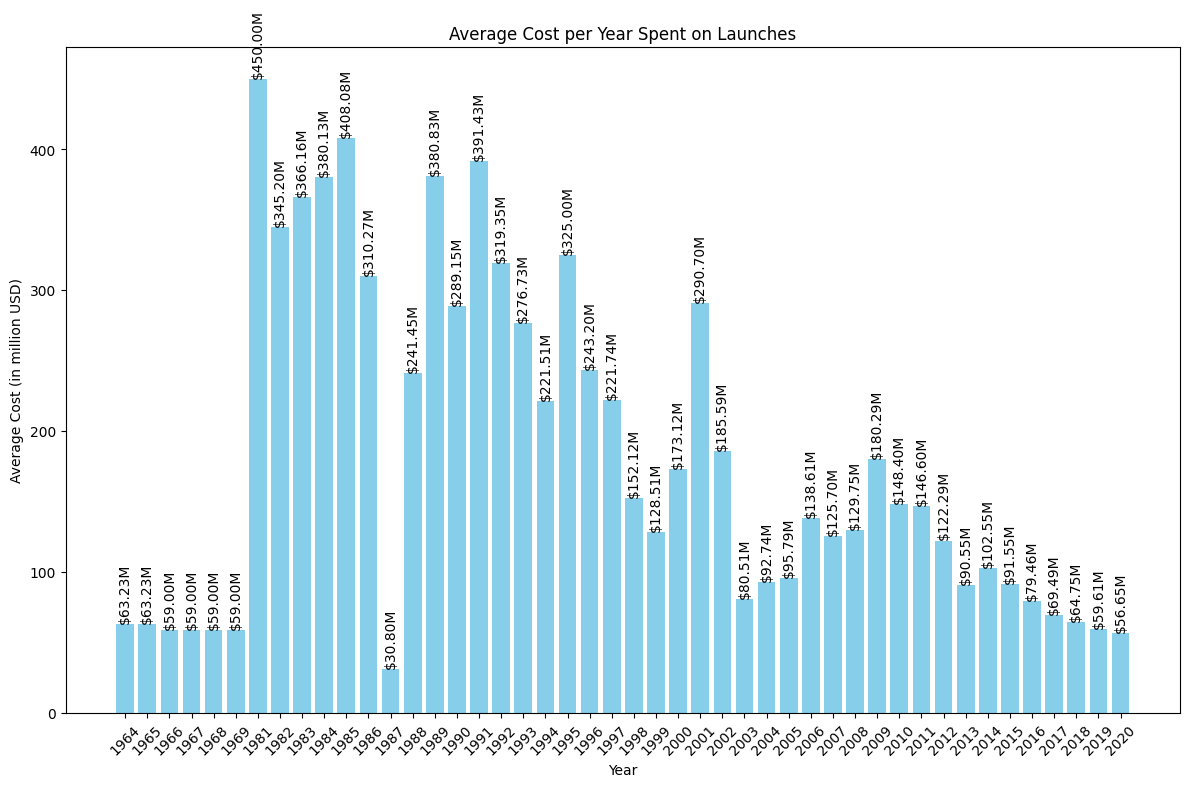

In [56]:
plt.figure(figsize=(12, 8))
bars = plt.bar(average_cost_per_year['Year'].astype(str), average_cost_per_year['Price'], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"${yval:.2f}M", ha='center', va='bottom', rotation=90, fontsize=10)

plt.title("Average Cost per Year Spent on Launches")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Average Cost (in million USD)")
plt.tight_layout()
plt.show()

Determine how many missions were launched by each orgainization


In [57]:
total_launches_per_org = df.groupby('Organisation').size().reset_index(name='Count')
total_launches_per_org = total_launches_per_org.sort_values(by='Count', ascending=False)

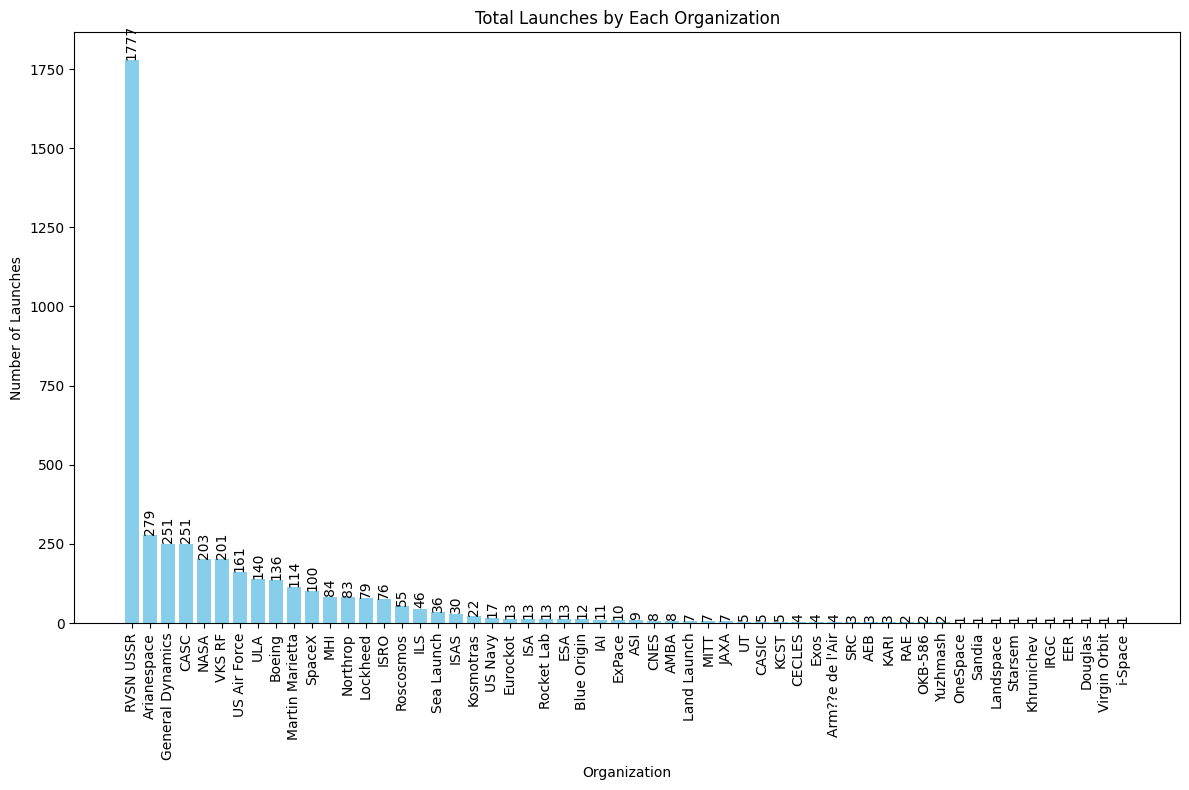

In [58]:
plt.figure(figsize=(12, 8))
bars = plt.bar(total_launches_per_org['Organisation'], total_launches_per_org['Count'], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), rotation=90, ha='center', va='bottom', fontsize=10)

plt.title("Total Launches by Each Organization")
plt.xlabel("Organization")
plt.xticks(rotation=90)
plt.ylabel("Number of Launches")
plt.tight_layout()
plt.show()

build a df of the mission status per organization.

In [59]:
mission_status_counts = df_clean.groupby(['Organisation', 'Mission_Status']).size().reset_index(name='Count')

In [60]:
mission_status_counts

,Organisation,Mission_Status,Count
0,Arianespace,Failure,2
1,Arianespace,Partial Failure,1
2,Arianespace,Success,93
3,Boeing,Partial Failure,1
4,Boeing,Success,6
5,CASC,Failure,3
6,CASC,Partial Failure,3
7,CASC,Success,152
8,EER,Failure,1
9,ESA,Success,1


Plot the data on a bar graph.

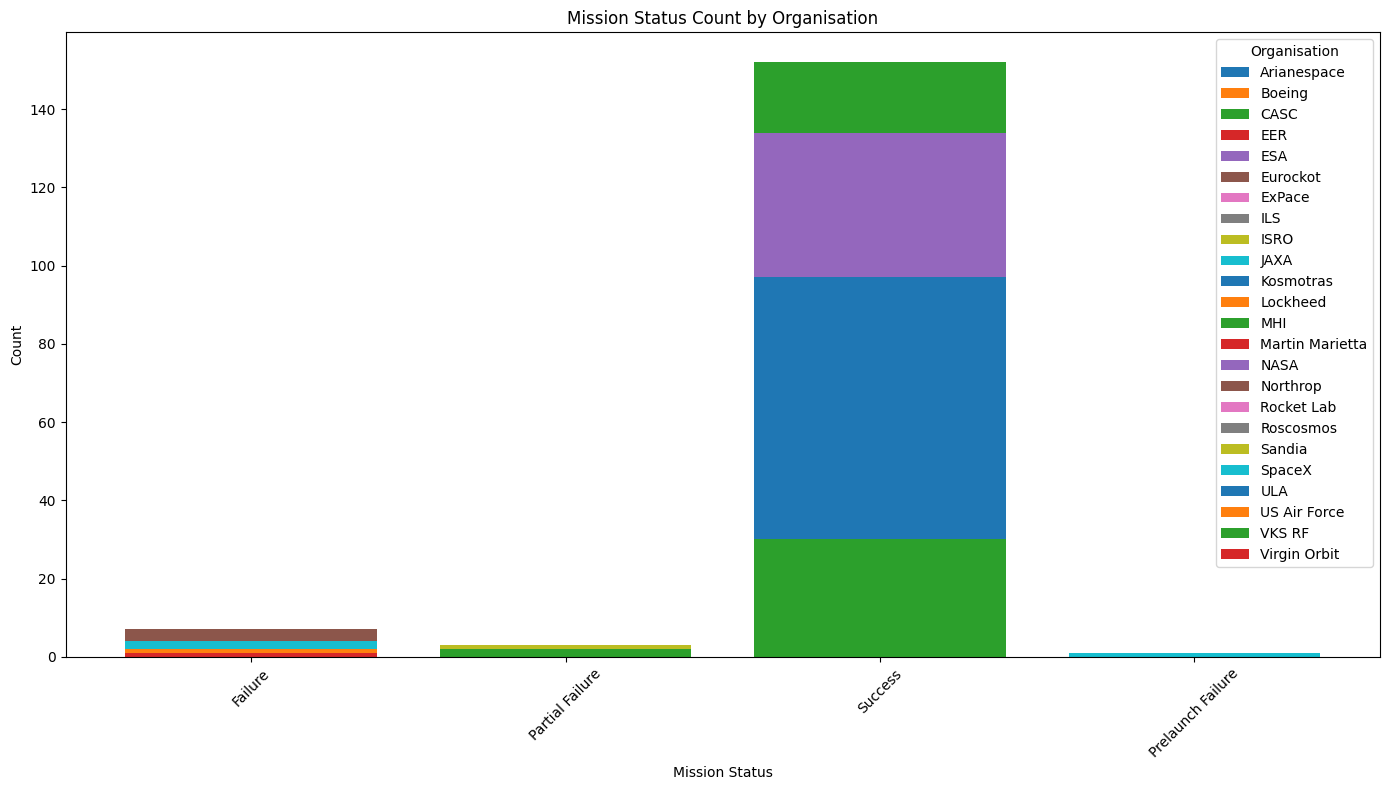

In [61]:
plt.figure(figsize=(14, 8))
for organisation in mission_status_counts['Organisation'].unique():
    subset = mission_status_counts[mission_status_counts['Organisation'] == organisation]
    plt.bar(subset['Mission_Status'], subset['Count'], label=organisation)

plt.xlabel('Mission Status')
plt.ylabel('Count')
plt.title('Mission Status Count by Organisation')
plt.legend(title='Organisation')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Showing the same information based on organizaion instead of mission status

In [63]:
total_counts = mission_status_counts.groupby('Organisation')['Count'].sum().reset_index(name='Total')
mission_status_percentages = pd.merge(mission_status_counts, total_counts, on='Organisation')
mission_status_percentages['Percentage'] = (mission_status_percentages['Count'] / mission_status_percentages['Total']) * 100


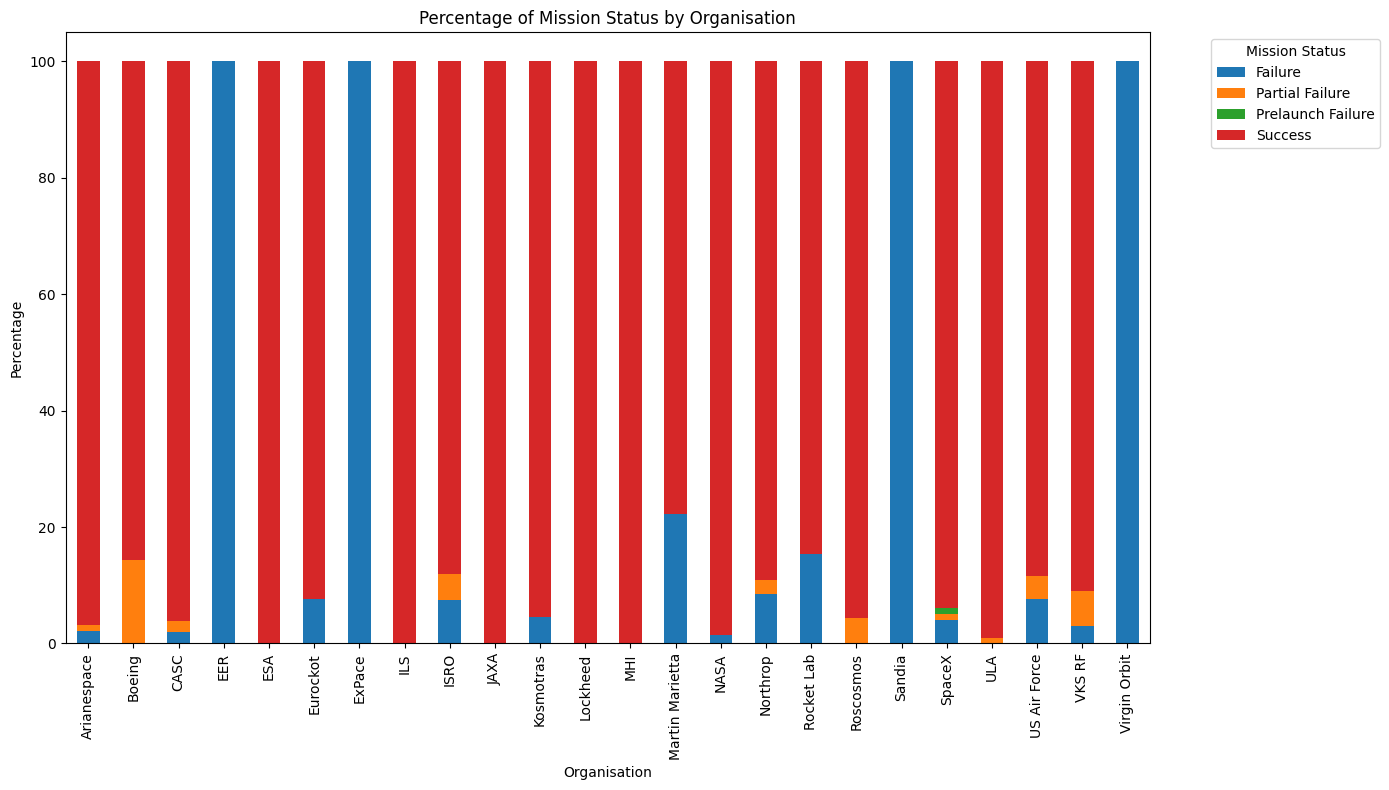

In [64]:
pivot_table = mission_status_percentages.pivot(index='Organisation', columns='Mission_Status', values='Percentage').fillna(0)
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.xlabel('Organisation')
plt.ylabel('Percentage')
plt.title('Percentage of Mission Status by Organisation')
plt.legend(title='Mission Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

Determine how success rates changed over time

In [65]:
yearly_status_counts = df_clean.groupby(['Year', 'Mission_Status']).size().reset_index(name='Count')

Find how many launches happened per year

In [66]:
total_missions_per_year = yearly_status_counts.groupby('Year')['Count'].sum().reset_index(name='Total')

then determine the mission status of those launches

In [67]:
yearly_status_percentages = pd.merge(yearly_status_counts, total_missions_per_year, on='Year')
yearly_status_percentages['Percentage'] = (yearly_status_percentages['Count'] / yearly_status_percentages['Total']) * 100


Plot the datea on a line graph to show change over time.
I speculate the success rates are more often determined by the age of the organization moreso than the amount of time in general.

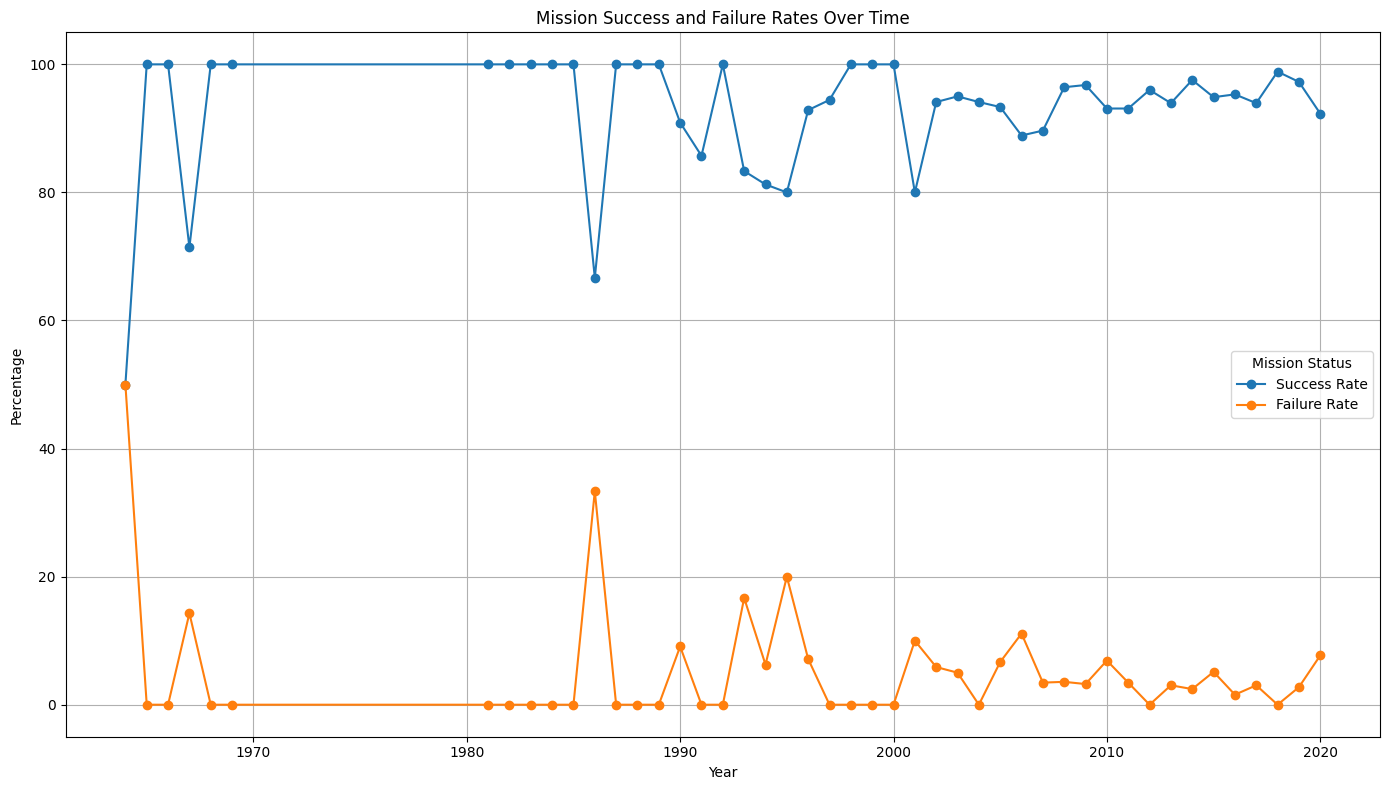

In [68]:
pivot_table = yearly_status_percentages.pivot(index='Year', columns='Mission_Status', values='Percentage').fillna(0)
plt.figure(figsize=(14, 8))
plt.plot(pivot_table.index, pivot_table.get('Success', [0]*len(pivot_table)), label='Success Rate', marker='o')
plt.plot(pivot_table.index, pivot_table.get('Failure', [0]*len(pivot_table)), label='Failure Rate', marker='o')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Mission Success and Failure Rates Over Time')
plt.legend(title='Mission Status')
plt.grid(True)
plt.tight_layout()

plt.show()